MILTIPLE LINEAR REGRESSION
Name - Devanand Saysing Vasave
PRN - 1930331245065

In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [5]:
df = pd.read_csv('C:\\Users\\Devesh\\PycharmProjects\\ProjectA\D001\\amsPredictionSheet1-201009-150447.csv')
df.head()

,Attendance,MSE,HRS,ESE
0,70,10,17,42
1,92,7,20,39
2,67,3,18,32
3,82,16,13,50
4,80,9,10,44


In [6]:
df.describe()

,Attendance,MSE,HRS,ESE
count,73.000000,73.000000,73.000000,73.000000
mean,81.698630,9.780822,12.904110,46.630137
std,9.506847,3.047069,5.701278,6.617542
min,62.000000,3.000000,2.000000,32.000000
25%,75.000000,8.000000,8.000000,42.000000
50%,80.000000,10.000000,14.000000,47.000000
75%,90.000000,11.000000,18.000000,50.000000
max,98.000000,17.000000,22.000000,64.000000


In [7]:
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Attendance,MSE,HRS,ESE
Attendance,1.000000,-0.080943,-0.165307,-0.109972
MSE,-0.080943,1.000000,0.177060,0.751530
HRS,-0.165307,0.177060,1.000000,0.255632
ESE,-0.109972,0.751530,0.255632,1.000000


In [8]:
endog = df['ESE']
exog = sm.add_constant(df[['MSE','Attendance','HRS']])
print(exog)

    const  MSE  Attendance  HRS
0     1.0   10          70   17
1     1.0    7          92   20
2     1.0    3          67   18
3     1.0   16          82   13
4     1.0    9          80   10
..    ...  ...         ...  ...
68    1.0   10          80   19
69    1.0    8          78   18
70    1.0    9          92    8
71    1.0   11          78    6
72    1.0   12          78   20

[73 rows x 4 columns]


C:\Users\Devesh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [9]:
X=exog.to_numpy()
Y= endog.to_numpy()
s1_xt =np.transpose(X)
print(s1_xt)

[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.]
 [10.  7.  3. 16.  9. 11.  7. 10.  8.  8.  8. 12.  4.  7. 15. 12.  6.  9.
  10.  7. 13.  5.  8. 12. 17. 11. 10. 16. 17. 12. 11. 13. 11. 10.  7.  6.
   9.  9. 12. 11.  6.  7. 14. 12. 10. 14.  5.  6. 11.  9.  9.  8.  9.  6.
  10. 17. 11. 11. 10.  8.  7.  7. 10. 11.  7. 12.  8. 10. 10.  8.  9. 11.
  12.]
 [70. 92. 67. 82. 80. 72. 85. 75. 80. 70. 85. 65. 70. 75. 80. 85. 75. 68.
  65. 95. 90. 78. 78. 80. 85. 95. 78. 79. 65. 98. 98. 68. 88. 75. 88. 88.
  88. 90. 75. 98. 95. 98. 78. 95. 75. 77. 85. 70. 95. 95. 75. 90. 90. 96.
  94. 80. 75. 78. 82. 80. 80. 92. 85. 68. 88. 80. 62. 82. 80. 78. 92. 78.
  78.]
 [17. 20. 18. 13. 10. 16. 18. 14. 14. 14. 16. 17. 17. 19. 20. 19. 15. 22.
  19. 20. 12.  8.

In [10]:
s2_mul1= np.matmul(s1_xt,X)
print(s2_mul1)

[[7.30000e+01 7.14000e+02 5.96400e+03 9.42000e+02]
 [7.14000e+02 7.65200e+03 5.81640e+04 9.43500e+03]
 [5.96400e+03 5.81640e+04 4.93758e+05 7.63150e+04]
 [9.42000e+02 9.43500e+03 7.63150e+04 1.44960e+04]]


In [11]:
s3_inv=np.linalg.inv(s2_mul1)
print(s3_inv)

[[ 1.38842078e+00 -1.55046712e-02 -1.37334738e-02 -7.83221221e-03]
 [-1.55046712e-02  1.54870518e-03  2.63702672e-05 -1.39285323e-04]
 [-1.37334738e-02  2.63702672e-05  1.58438230e-04  4.11779368e-05]
 [-7.83221221e-03 -1.39285323e-04  4.11779368e-05  4.51821652e-04]]


In [12]:
s4_mul= np.matmul(s3_inv,s1_xt)
print(s4_mul)

[[ 1.38883294e-01 -1.40235753e-01  2.80784202e-01 -8.76175706e-02
   7.18787124e-02  1.03743887e-01 -2.84370119e-02  9.37125614e-02
   5.60545348e-02  1.93389273e-01 -2.82772588e-02  1.76541321e-01
   2.31911321e-01  1.01065514e-01 -9.94714372e-02 -1.13792580e-01
   1.47899034e-01  1.42693852e-01  1.91886239e-01 -1.81436175e-01
  -1.43139135e-01  1.77028769e-01  1.77508029e-01  8.80223963e-02
  -1.99148149e-01 -1.80797162e-01  1.23002050e-01 -1.01242635e-01
   1.22514601e-01 -2.29670042e-01 -1.98500947e-01  1.43332864e-01
  -1.00327270e-01  1.17209198e-01  4.78457497e-02  5.55182088e-02
  -1.44924416e-02 -8.89526625e-02  7.05354311e-02 -2.84655281e-01
  -4.84483202e-02 -9.73212007e-02  3.74867282e-02 -1.49308560e-01
   1.64202471e-01  7.47168387e-02  8.08944526e-02  2.63559677e-01
  -2.43454860e-01 -1.18458971e-01  1.64042718e-01 -3.42869302e-02
  -1.43778148e-01 -1.17007279e-01 -1.59391229e-01 -1.14816355e-01
   1.40865588e-01 -9.98580456e-03 -5.72472408e-02  1.10880020e-01
   8.72236

In [13]:
s5_res =np.matmul(s4_mul,Y)
print(s5_res)

[ 3.11156436e+01  1.57990739e+00 -2.15574027e-02  1.41265918e-01]


In [14]:
mod = sm.OLS(endog, exog)
results = mod.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:                    ESE   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     31.92
Date:                Sun, 26 Dec 2021   Prob (F-statistic):           4.68e-13
Time:                        14:19:00   Log-Likelihood:                -209.26
No. Observations:                  73   AIC:                             426.5
Df Residuals:                      69   BIC:                             435.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.1156      5.154      6.037      0.0

In [15]:
def RSE(y_true, y_predicted):
   
    y_true = np.array(y_true)
    y_predicted = np.array(y_predicted)
    RSS = np.sum(np.square(y_true - y_predicted))

    rse = math.sqrt(RSS / (len(y_true) - 2))
    return rse

<AxesSubplot:>

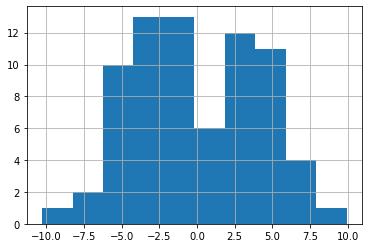

In [16]:
yp= results.predict()
ypa = np.array(yp)
yta = df['ESE']
eterms =yta-ypa


df1 = pd.DataFrame(eterms)
df1['ESE'].hist(bins=10)

In [17]:
rse= RSE(df['ESE'],results.predict())
print(rse)

4.312395731438574


In [18]:
from sklearn import linear_model
X = df[['MSE','Attendance','HRS']]
y = df['ESE']

lm = linear_model.LinearRegression()
model = lm.fit(X,y)
lm.coef_

array([ 1.57990739, -0.0215574 ,  0.14126592])

In [19]:
lm.intercept_

31.115643575666336